### Student Information
Name:曹靖倫

Student ID:111306061

GitHub ID:jinglun0928

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [3]:
# Environment Setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import math
import helpers.data_mining_helpers as dmh

print("Environment setup completed!")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Environment setup completed!


In [5]:
# Load Reddit Stock Sentiment Dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

print("=== Dataset Overview ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print()

print("=== First few rows ===")
print(df.head())
print()

print("=== Dataset info ===")
print(df.info())


=== Dataset Overview ===
Dataset shape: (847, 16)
Columns: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

=== First few rows ===
      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMA

In [6]:
# Data Preprocessing - Create DataFrame similar to master notebook
# Select only necessary columns: text and label
X = df[['text', 'label']].copy()

print("=== Exercise 1: Print text data for first three samples ===")
for i in range(3):
    print(f"\n--- Sample {i+1} ---")
    print(f"Label: {X.iloc[i]['label']}")
    print(f"Text: {X.iloc[i]['text'][:200]}...")


=== Exercise 1: Print text data for first three samples ===

--- Sample 1 ---
Label: -1.0
Text: Calls on retards...

--- Sample 2 ---
Label: 0.0
Text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever....

--- Sample 3 ---
Label: 0.0
Text: Seeing lots of red in the ticker....


In [7]:
# Exercise 2: Experiment with pandas DataFrame querying techniques
print("=== Exercise 2: pandas DataFrame 查詢技術實驗 ===")

# 1. 使用 loc 查詢前5行
print("1. 使用 loc 查詢前5行:")
print(X.loc[:4, 'text'])
print()

# 2. 條件查詢 - 按標籤查詢
print("2. 條件查詢 - 正面情感 (label = 1.0):")
positive_samples = X[X['label'] == 1.0]
print(f"找到 {len(positive_samples)} 個正面情感樣本")
print()

# 3. 使用 query 方法
print("3. 使用 query 方法:")
result = X.query('text.str.len() > 100')
print(f"文字長度 > 100 的樣本數量: {len(result)}")
print()

# 4. 隨機取樣
print("4. 隨機取樣:")
random_sample = X.sample(n=2, random_state=42)
print("隨機選取的2個樣本:")
for i, (idx, row) in enumerate(random_sample.iterrows()):
    print(f"樣本 {i+1}: {row['text'][:50]}...")


=== Exercise 2: pandas DataFrame 查詢技術實驗 ===
1. 使用 loc 查詢前5行:
0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
Name: text, dtype: object

2. 條件查詢 - 正面情感 (label = 1.0):
找到 109 個正面情感樣本

3. 使用 query 方法:
文字長度 > 100 的樣本數量: 337

4. 隨機取樣:
隨機選取的2個樣本:
樣本 1: "We" who?...
樣本 2: Chicken jockey...


In [8]:
# Exercise 3: Query specific label records
print("=== Exercise 3: 查詢特定標籤記錄 ===")

# 查詢中性情感記錄 (label = 0.0)
neutral_records = X[X['label'] == 0.0]
print(f"中性情感記錄總數: {len(neutral_records)}")
print()

# 每10個取一個，只顯示前5個
every_10th = neutral_records.iloc[::10]
first_5 = every_10th.head(5)

print("每10個取一個的中性情感記錄 (前5個):")
for i, (idx, row) in enumerate(first_5.iterrows()):
    print(f"\n--- 記錄 {i+1} (原始索引: {idx}) ---")
    print(f"文字長度: {len(row['text'])} 字符")
    print(f"文字內容: {row['text'][:200]}...")


=== Exercise 3: 查詢特定標籤記錄 ===
中性情感記錄總數: 423

每10個取一個的中性情感記錄 (前5個):

--- 記錄 1 (原始索引: 1) ---
文字長度: 137 字符
文字內容: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever....

--- 記錄 2 (原始索引: 22) ---
文字長度: 45 字符
文字內容: Google "target dei".

I did it for you.

...

--- 記錄 3 (原始索引: 40) ---
文字長度: 85 字符
文字內容: These China AI factory memes are pretty good. I gotta admit they boomed us this time....

--- 記錄 4 (原始索引: 55) ---
文字長度: 9 字符
文字內容: The steal...

--- 記錄 5 (原始索引: 72) ---
文字長度: 524 字符
文字內容: A lot of stocks are down right now, and I'm thinking of spending 250 on the below tmmw. Thoughts (some are partial cuz im using robinhood)?

Reddit - $60

Nvidia - $70

KULR - $40

ICU - $40
...


In [9]:
# Exercise 4: Calculate missing values per record using axis parameter
print("=== Exercise 4: 計算每筆記錄的缺失值 ===")

# 計算每筆記錄的缺失值
missing_values_per_record = X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)
print("每筆記錄的缺失值數量:")
print(missing_values_per_record.head(10))


=== Exercise 4: 計算每筆記錄的缺失值 ===
每筆記錄的缺失值數量:
0    (The amoung of missing records is: , 0)
1    (The amoung of missing records is: , 0)
2    (The amoung of missing records is: , 0)
3    (The amoung of missing records is: , 0)
4    (The amoung of missing records is: , 0)
5    (The amoung of missing records is: , 0)
6    (The amoung of missing records is: , 0)
7    (The amoung of missing records is: , 0)
8    (The amoung of missing records is: , 0)
9    (The amoung of missing records is: , 0)
dtype: object


In [17]:
# Exercise 5: Check data and process, describe observations
print("=== Exercise 5: 檢查資料和過程 ===")

# 檢查資料類型
print("1. 檢查資料類型:")
print(X.dtypes)
print()

# 檢查是否有空字串
print("2. 檢查是否有空字串:")
empty_strings = (X['text'] == '').sum()
print(f"空字串數量: {empty_strings}")
print()

# 檢查是否有只包含空白字符的字串
print("3. 檢查是否有只包含空白字符的字串:")
whitespace_only = X['text'].str.strip().eq('').sum()
print(f"只包含空白字符的字串數量: {whitespace_only}")
print()

# 檢查文字長度分佈
print("4. 檢查文字長度分佈:")
text_lengths = X['text'].str.len()
print(f"最短文字長度: {text_lengths.min()}, 最長: {text_lengths.max()}, 平均: {text_lengths.mean():.2f}")
print()

# 檢查標籤分佈
print("5. 檢查標籤分佈:")
print(X['label'].value_counts())
print()

=== Exercise 5: 檢查資料和過程 ===
1. 檢查資料類型:
text      object
label    float64
dtype: object

2. 檢查是否有空字串:
空字串數量: 0

3. 檢查是否有只包含空白字符的字串:
只包含空白字符的字串數量: 0

4. 檢查文字長度分佈:
最短文字長度: 1, 最長: 2753, 平均: 148.68

5. 檢查標籤分佈:
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64



In [18]:
# Data Sampling
print("=== 數據取樣 ===")

# 創建取樣數據集
X_sample = X.sample(n=min(1000, len(X)), random_state=42)
print(f"原始數據集大小: {X.shape}")
print(f"取樣後數據集大小: {X_sample.shape}")
print()

# Exercise 6: Compare changes between X and X_sample DataFrames
print("=== Exercise 6: 比較 X 和 X_sample DataFrame 的變化 ===")

# 1. 檢查 DataFrame 形狀
print("1. DataFrame 形狀比較:")
print(f"X 的形狀: {X.shape}")
print(f"X_sample 的形狀: {X_sample.shape}")
print()

# 2. 檢查標籤分佈
print("2. 標籤分佈比較:")
print("X 的標籤分佈:")
print(X['label'].value_counts())
print("\nX_sample 的標籤分佈:")
print(X_sample['label'].value_counts())
print()


=== 數據取樣 ===
原始數據集大小: (847, 2)
取樣後數據集大小: (847, 2)

=== Exercise 6: 比較 X 和 X_sample DataFrame 的變化 ===
1. DataFrame 形狀比較:
X 的形狀: (847, 2)
X_sample 的形狀: (847, 2)

2. 標籤分佈比較:
X 的標籤分佈:
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64

X_sample 的標籤分佈:
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64



In [19]:
# Text Transformation and Term Frequency Analysis
print("=== 文本轉換和詞頻分析 ===")

# 使用 CountVectorizer 進行文本轉換
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_sample.text)

print(f"文檔-詞彙矩陣形狀: {X_counts.shape}")
print(f"詞彙數量: {len(count_vect.get_feature_names_out())}")
print()

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(f"詞頻統計:")
print(f"最高頻率: {max(term_frequencies)}")
print(f"最低頻率: {min(term_frequencies)}")
print(f"平均頻率: {np.mean(term_frequencies):.2f}")
print()

# Exercise 7: Automate ylim parameters instead of hard-coding
print("=== Exercise 7: 自動化 ylim 參數 ===")

# 自動化 ylim 參數
max_value = max(term_frequencies)
print(f"原始硬編碼方式: plt.ylim(0, 1000)")
print(f"自動化方式: plt.ylim(0, {max_value})")
print(f"最大值 + 10% 邊距: plt.ylim(0, {max_value * 1.1:.0f})")
print()


=== 文本轉換和詞頻分析 ===
文檔-詞彙矩陣形狀: (847, 4346)
詞彙數量: 4346

詞頻統計:
最高頻率: 920
最低頻率: 1
平均頻率: 4.84

=== Exercise 7: 自動化 ylim 參數 ===
原始硬編碼方式: plt.ylim(0, 1000)
自動化方式: plt.ylim(0, 920)
最大值 + 10% 邊距: plt.ylim(0, 1012)



=== Exercise 8: 並排比較兩個資料集的分佈 ===


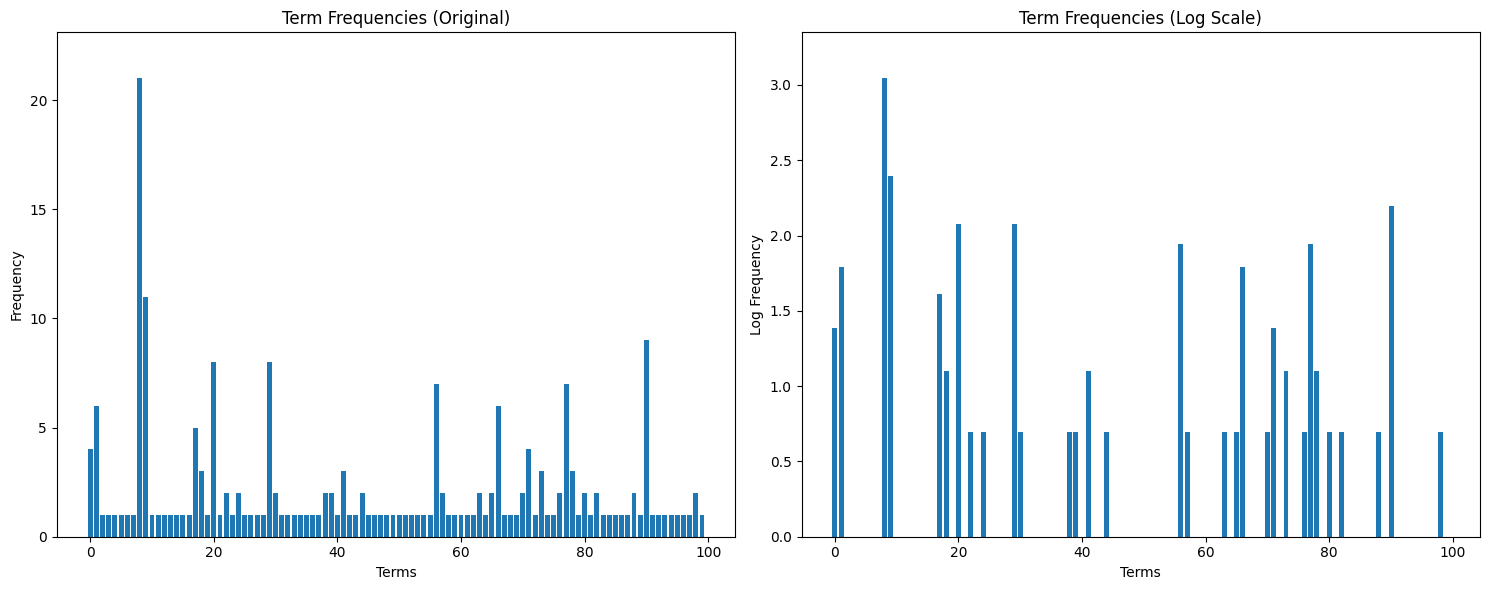

In [20]:
# Exercise 8: Side-by-side comparison of distribution between two datasets
print("=== Exercise 8: 並排比較兩個資料集的分佈 ===")

# 計算對數詞頻
term_frequencies_log = [math.log(i) for i in term_frequencies]

# 創建並排比較圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 左圖：原始 term_frequencies
ax1.bar(range(len(term_frequencies[:100])), term_frequencies[:100])
ax1.set_title('Term Frequencies (Original)')
ax1.set_xlabel('Terms')
ax1.set_ylabel('Frequency')
ax1.set_ylim(0, max(term_frequencies[:100]) * 1.1)

# 右圖：對數 term_frequencies_log
ax2.bar(range(len(term_frequencies_log[:100])), term_frequencies_log[:100])
ax2.set_title('Term Frequencies (Log Scale)')
ax2.set_xlabel('Terms')
ax2.set_ylabel('Log Frequency')
ax2.set_ylim(0, max(term_frequencies_log[:100]) * 1.1)

plt.tight_layout()
plt.show()



In [21]:
# Exercise 9: Analyze first record with analyzer
print("=== Exercise 9: 使用 analyzer 分析第一個記錄 ===")

# 使用 build_analyzer() 分析第一個記錄
analyze = count_vect.build_analyzer()
first_record_tokens = analyze(X_sample.iloc[0]['text'])

print("第一個記錄的原始文字:")
print(X_sample.iloc[0]['text'][:200] + "...")
print()

print("使用 analyzer 分析後的 tokens:")
print(first_record_tokens[:20])  # 只顯示前20個 tokens
print()

print("總共 tokens 數量:", len(first_record_tokens))
print("前10個 tokens:", first_record_tokens[:10])
print("後10個 tokens:", first_record_tokens[-10:])
print()



=== Exercise 9: 使用 analyzer 分析第一個記錄 ===
第一個記錄的原始文字:
"We" who?...

使用 analyzer 分析後的 tokens:
['we', 'who']

總共 tokens 數量: 2
前10個 tokens: ['we', 'who']
後10個 tokens: ['we', 'who']



In [22]:
# Exercise 10: Find what word the second 1 in fifth record represents
print("=== Exercise 10: 找到第五個記錄中另一個 1 所代表的詞彙 ===")

# 取得第五個記錄 (索引為 4)
fifth_record = X_counts[4].toarray()[0]

print("第五個記錄的詞頻向量:")
print(fifth_record[:20])  # 顯示前20個值
print()

# 找到所有非零位置 (值為 1 的位置)
non_zero_positions = np.where(fifth_record > 0)[0]

print("第五個記錄中所有非零位置:")
print(non_zero_positions)
print()

# 取得詞彙名稱
vocabulary = count_vect.get_feature_names_out()

print("對應的詞彙:")
for pos in non_zero_positions:
    word = vocabulary[pos]
    count = fifth_record[pos]
    print(f"位置 {pos}: '{word}' (出現 {count} 次)")
print()

# 特別找出除了第一個位置之外的其他 1
if len(non_zero_positions) > 1:
    second_one_position = non_zero_positions[1]
    second_one_word = vocabulary[second_one_position]
    print(f"=== 答案 ===")
    print(f"第五個記錄中另一個 1 代表詞彙: '{second_one_word}'")
    print(f"位置: {second_one_position}")
else:
    print("第五個記錄中只有一個非零值")


=== Exercise 10: 找到第五個記錄中另一個 1 所代表的詞彙 ===
第五個記錄的詞頻向量:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

第五個記錄中所有非零位置:
[ 697 3113 3866 4229]

對應的詞彙:
位置 697: 'can' (出現 1 次)
位置 3113: 'read' (出現 1 次)
位置 3866: 'this' (出現 1 次)
位置 4229: 'where' (出現 1 次)

=== 答案 ===
第五個記錄中另一個 1 代表詞彙: 'read'
位置: 3113


=== Exercise 11: 高效視覺化 term-document matrix ===


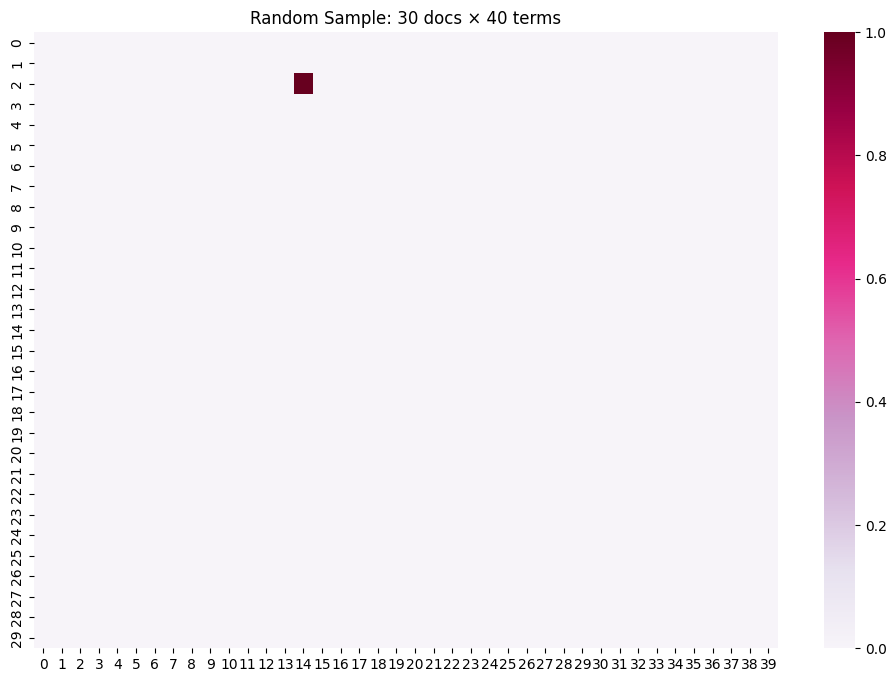

In [23]:
# Exercise 11: Modify code to plot entire term-document matrix efficiently
print("=== Exercise 11: 高效視覺化 term-document matrix ===")

# 使用隨機取樣視覺化
def plot_random_sample(X_counts, n_docs=30, n_terms=40):
    """隨機取樣文檔和詞彙進行視覺化"""
    # 隨機選擇文檔和詞彙
    doc_indices = np.random.choice(X_counts.shape[0], min(n_docs, X_counts.shape[0]), replace=False)
    term_indices = np.random.choice(X_counts.shape[1], min(n_terms, X_counts.shape[1]), replace=False)
    
    # 取得子矩陣
    submatrix = X_counts[doc_indices][:, term_indices].toarray()
    
    # 繪製 heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(submatrix, cmap="PuRd", vmin=0, vmax=1, annot=False)
    plt.title(f'Random Sample: {len(doc_indices)} docs × {len(term_indices)} terms')
    plt.show()
    
    return submatrix

# 執行隨機取樣
sample_matrix = plot_random_sample(X_counts, n_docs=30, n_terms=40)



In [24]:
# Exercise 12: Create interactive visualization using plotly
print("=== Exercise 12: 使用 plotly 創建互動式視覺化 ===")

# 使用 plotly 的 heatmap (簡化版)
def create_interactive_heatmap(X_counts, n_docs=20, n_terms=20):
    """創建互動式 heatmap"""
    # 隨機選擇文檔和詞彙
    doc_indices = np.random.choice(X_counts.shape[0], min(n_docs, X_counts.shape[0]), replace=False)
    term_indices = np.random.choice(X_counts.shape[1], min(n_terms, X_counts.shape[1]), replace=False)
    
    # 取得子矩陣
    submatrix = X_counts[doc_indices][:, term_indices].toarray()
    
    # 取得詞彙名稱
    vocabulary = count_vect.get_feature_names_out()
    term_names = [vocabulary[i] for i in term_indices]
    
    # 創建 plotly heatmap
    fig = go.Figure(data=go.Heatmap(
        z=submatrix,
        x=term_names,
        y=[f'Doc {i}' for i in doc_indices],
        colorscale='PuRd',
        hoverongaps=False
    ))
    
    fig.update_layout(
        title=f'Interactive Term-Document Matrix ({len(doc_indices)} docs × {len(term_indices)} terms)',
        xaxis_title='Terms',
        yaxis_title='Documents',
        width=800,
        height=600
    )
    
    # 使用不同的顯示方法
    try:
        fig.show()
    except:
        # 如果無法顯示，輸出圖表資訊
        print("圖表已創建，但無法在此環境中顯示")
        print(f"矩陣大小: {submatrix.shape}")
        print(f"非零值數量: {np.count_nonzero(submatrix)}")
    
    return submatrix

# 執行互動式視覺化
print("創建互動式 heatmap...")
sample_matrix = create_interactive_heatmap(X_counts, n_docs=15, n_terms=25)



=== Exercise 12: 使用 plotly 創建互動式視覺化 ===
創建互動式 heatmap...
圖表已創建，但無法在此環境中顯示
矩陣大小: (15, 25)
非零值數量: 1


In [25]:
# Exercise 13: Efficiently reduce number of terms to visualize
print("=== Exercise 13: 高效減少視覺化詞彙數量 ===")

# 基於詞頻過濾，只保留高頻詞彙
min_freq = 5  # 最小頻率閾值
max_terms = 30  # 最大詞彙數量

# 找到頻率 >= min_freq 的詞彙
high_freq_indices = np.where(term_frequencies >= min_freq)[0]

# 如果太多，選擇頻率最高的前 max_terms 個
if len(high_freq_indices) > max_terms:
    sorted_indices = np.argsort(term_frequencies[high_freq_indices])[::-1]
    selected_indices = high_freq_indices[sorted_indices[:max_terms]]
else:
    selected_indices = high_freq_indices

print(f"原始詞彙數量: {len(vocabulary)}")
print(f"過濾後詞彙數量: {len(selected_indices)}")
print(f"減少比例: {(1 - len(selected_indices)/len(vocabulary))*100:.1f}%")

# 顯示選中的詞彙
selected_terms = [vocabulary[i] for i in selected_indices]
print(f"\n選中的詞彙 (前10個):")
for i, term in enumerate(selected_terms[:10]):
    freq = term_frequencies[selected_indices[i]]
    print(f"{i+1}. {term} (頻率: {freq})")


=== Exercise 13: 高效減少視覺化詞彙數量 ===
原始詞彙數量: 4346
過濾後詞彙數量: 30
減少比例: 99.3%

選中的詞彙 (前10個):
1. the (頻率: 920)
2. to (頻率: 566)
3. and (頻率: 488)
4. is (頻率: 402)
5. it (頻率: 350)
6. of (頻率: 311)
7. in (頻率: 286)
8. that (頻率: 238)
9. for (頻率: 214)
10. this (頻率: 213)


=== Exercise 14: 按頻率排序詞彙，觀察長尾效應 ===


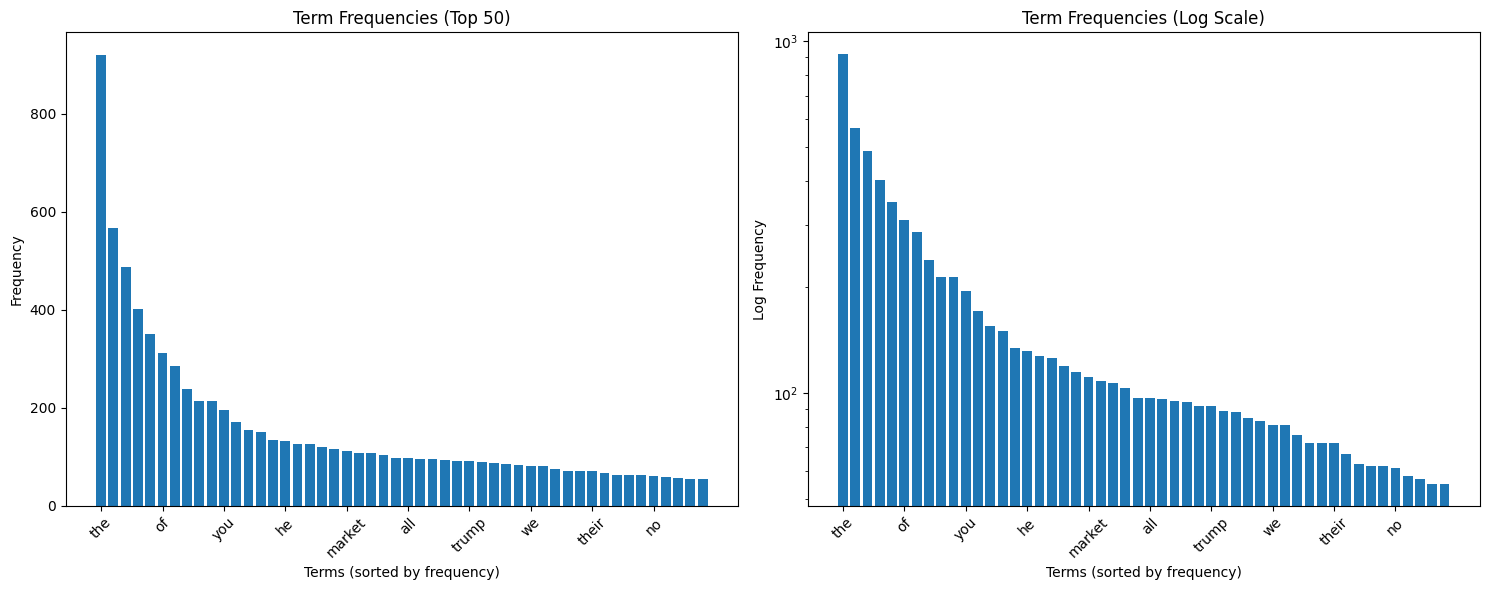

In [27]:
# Exercise 14: Sort terms by frequency to observe long tail effect
print("=== Exercise 14: 按頻率排序詞彙，觀察長尾效應 ===")

# 按頻率排序詞彙
sorted_indices = np.argsort(term_frequencies)[::-1]  # 降序排序
sorted_freq = term_frequencies[sorted_indices]
sorted_vocab = [vocabulary[i] for i in sorted_indices]

# 只顯示前50個詞彙
top_n = 50
display_freq = sorted_freq[:top_n]
display_vocab = sorted_vocab[:top_n]

# 創建圖表
plt.figure(figsize=(15, 6))

# 左圖：普通尺度
plt.subplot(1, 2, 1)
plt.bar(range(len(display_freq)), display_freq)
plt.title(f'Term Frequencies (Top {top_n})')
plt.xlabel('Terms (sorted by frequency)')
plt.ylabel('Frequency')
plt.xticks(range(0, len(display_vocab), 5), 
           [display_vocab[i] for i in range(0, len(display_vocab), 5)], 
           rotation=45)

# 右圖：對數尺度
plt.subplot(1, 2, 2)
plt.bar(range(len(display_freq)), display_freq)
plt.title(f'Term Frequencies (Log Scale)')
plt.xlabel('Terms (sorted by frequency)')
plt.ylabel('Log Frequency')
plt.yscale('log')
plt.xticks(range(0, len(display_vocab), 5), 
           [display_vocab[i] for i in range(0, len(display_vocab), 5)], 
           rotation=45)

plt.tight_layout()
plt.show()



=== Exercise 15: 使用對數頻率分析長尾效應 ===


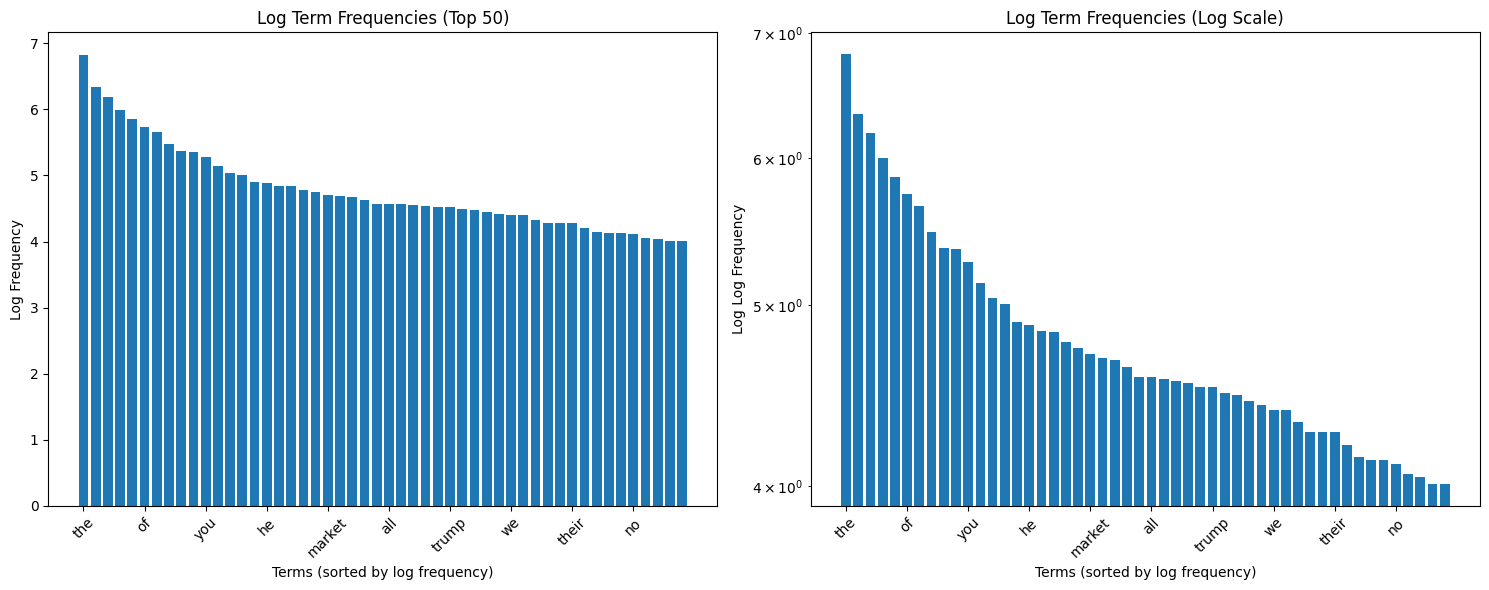

In [28]:
# Exercise 15: Analyze log distribution differences and insights
print("=== Exercise 15: 使用對數頻率分析長尾效應 ===")

# 使用對數頻率
term_frequencies_log = [math.log(i) for i in term_frequencies]

# 按對數頻率排序詞彙
sorted_indices_log = np.argsort(term_frequencies_log)[::-1]  # 降序排序
sorted_freq_log = np.array(term_frequencies_log)[sorted_indices_log]
sorted_vocab_log = [vocabulary[i] for i in sorted_indices_log]

# 只顯示前50個詞彙
top_n = 50
display_freq_log = sorted_freq_log[:top_n]
display_vocab_log = sorted_vocab_log[:top_n]

# 創建圖表
plt.figure(figsize=(15, 6))

# 左圖：對數頻率
plt.subplot(1, 2, 1)
plt.bar(range(len(display_freq_log)), display_freq_log)
plt.title(f'Log Term Frequencies (Top {top_n})')
plt.xlabel('Terms (sorted by log frequency)')
plt.ylabel('Log Frequency')
plt.xticks(range(0, len(display_vocab_log), 5), 
           [display_vocab_log[i] for i in range(0, len(display_vocab_log), 5)], 
           rotation=45)

# 右圖：對數尺度的對數頻率
plt.subplot(1, 2, 2)
plt.bar(range(len(display_freq_log)), display_freq_log)
plt.title(f'Log Term Frequencies (Log Scale)')
plt.xlabel('Terms (sorted by log frequency)')
plt.ylabel('Log Log Frequency')
plt.yscale('log')
plt.xticks(range(0, len(display_vocab_log), 5), 
           [display_vocab_log[i] for i in range(0, len(display_vocab_log), 5)], 
           rotation=45)

plt.tight_layout()
plt.show()



# Phase 2

In [ ]:
### Begin Assignment Here